In [1]:
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img = image.load_img('/content/drive/MyDrive/data2/training/dangerous/B0008_0264.jpg')

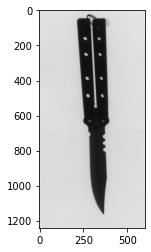

In [4]:
plt.imshow(img)

In [5]:
cv2.imread('/content/drive/MyDrive/data2/training/dangerous/B0008_0264.jpg').shape

(1241, 601, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/data2/training/',
                                          target_size = (200, 200),
                                          classes = ['dangerous', 'safe'],
                                          batch_size = 30,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/data2/validation/',
                                          target_size = (200, 200),
                                          classes = ['dangerous', 'safe'],
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 449 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'dangerous': 0, 'safe': 1}

In [9]:
validation_dataset.class_indices

{'dangerous': 0, 'safe': 1}

In [10]:
IMG_SHAPE = (200, 200, 3)

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [13]:
base_model.trainable = False

In [16]:
model = tf.keras.models.Sequential([base_model,
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid'),
                                    ])

In [17]:
model.layers[0].trainable = False

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.01), #zmiana
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 8, #zmiana
                      epochs = 10, #zmiana
                      verbose = 1,
                      validation_data = validation_dataset,
                      validation_steps = 2) #zmiana (moze wywalic)

Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 0.1371 - accuracy: 0.9500 - val_loss: 0.1158 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 12s 1s/step - loss: 0.2405 - accuracy: 0.9079 - val_loss: 0.3145 - val_accuracy: 0.8333
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 0.0855 - accuracy: 0.9749 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.0731 - accuracy: 0.9667 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.3364 - accuracy: 0.9038 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

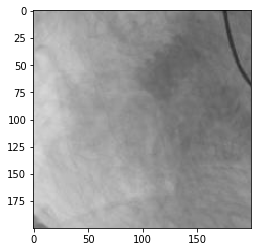

[0.8628861]
Safe


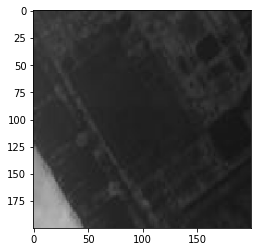

[0.8181405]
Safe


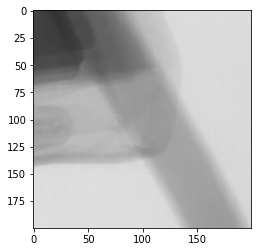

[0.9377165]
Safe


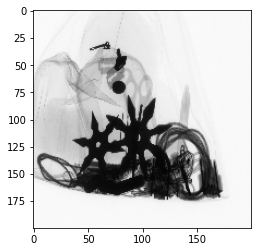

[0.10403585]
Dangerous


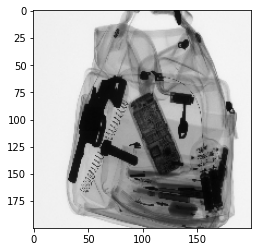

[0.02706403]
Dangerous


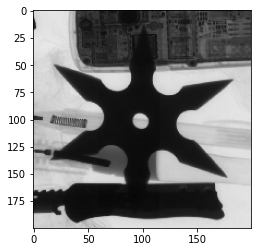

[0.08807939]
Dangerous


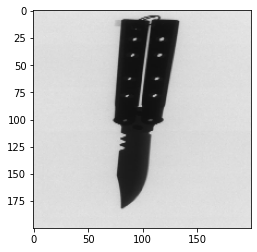

[0.5965304]
Safe


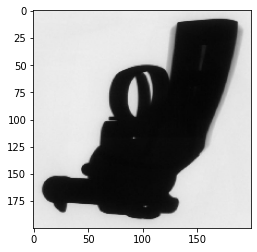

[0.18226415]
Dangerous


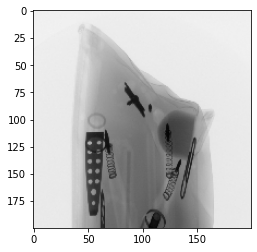

[0.2924468]
Dangerous


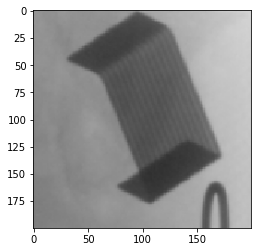

[0.59481996]
Safe


In [32]:
dir_path = '/content/drive/MyDrive/data2/showcase/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(val[0])
  if val[0]<0.5:
    print('Dangerous')
  else:
    print('Safe')